## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [05] : [Klasifikasi Bayes] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [208]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Reinhard Javera Maheswara"
myNIM = "77732"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Reinhard Javera Maheswara
NIM: 		77732
Start: 		2024-09-29 22:50:08.469280
Device ID: 	80dac05f-7e7a-11ef-b4eb-88b29eef8de5



---

### Dataset yang dipakai:

1. [Name_Gender] – sumber : [https://archive.ics.uci.edu/dataset/591/gender+by+name]
2. [Movie Sentiment] – sumber : [https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis]

### Hasil kerja

### NAÏVE BAYES CLASSIFIER 

In [209]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

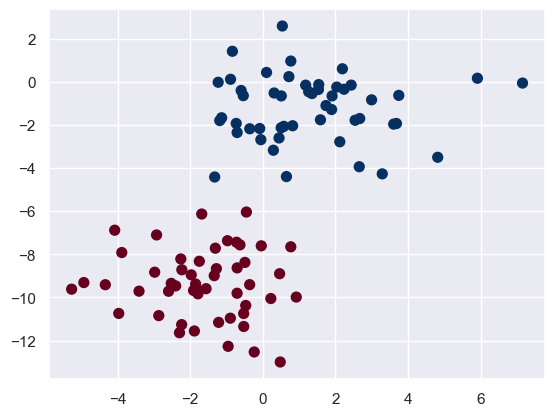

In [210]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')

[(-8.0, 8.0), (-15.0, 5.0)]

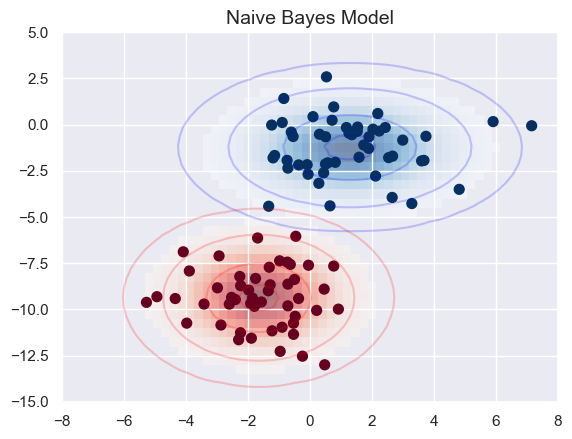

In [211]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5, 
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape), 
               levels=[0.01, 0.1, 0.5, 0.9], 
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)

In [212]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [213]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

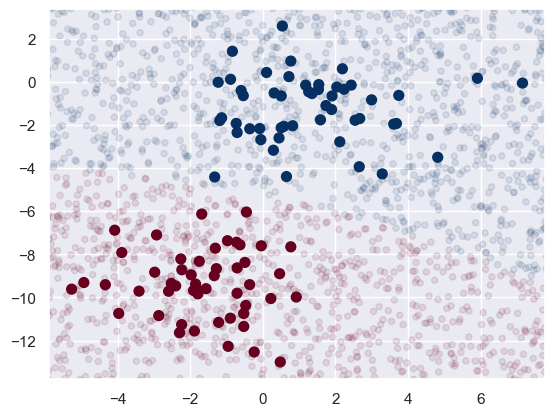

In [214]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [215]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### MULTINOMIAL NAÏVE BAYES

In [216]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [217]:
categories = ['talk.religion.misc', 'soc.religion.christian', 
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [218]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [220]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

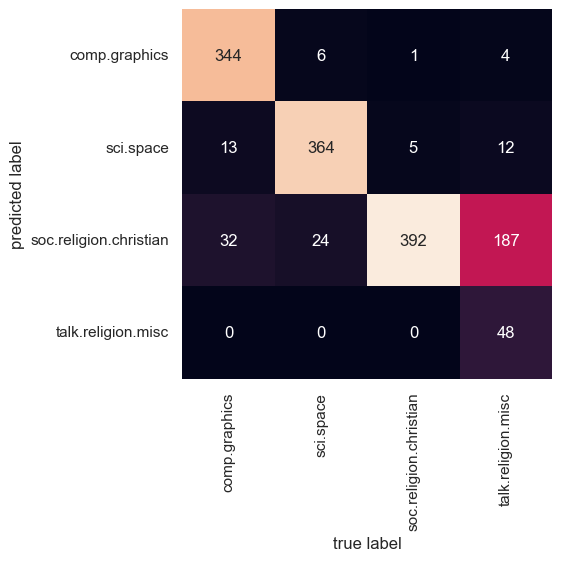

In [221]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [222]:
predict_category('sending a payload to the ISS')



1

In [223]:
predict_category('discussing islam vs atheism')

2

In [224]:
predict_category('deterining the screen resolution')

0

### BAYESIAN LEARNING AND BAYES' THEOREM

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

In [226]:
file_path = "IMDB Dataset.csv"
df = pd.read_csv(r"E:/_Kuliah/Semester 5/MachineLearning/Week5/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [227]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [229]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred = nb_model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi untuk data diskret: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Akurasi untuk data diskret: 0.8488
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

scaler = StandardScaler(with_mean=False)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = gnb_model.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Akurasi untuk data kontinu (TF-IDF): {accuracy_tfidf:.4f}')
print(classification_report(y_test, y_pred_tfidf))

Akurasi untuk data kontinu (TF-IDF): 0.8002
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4961
           1       0.81      0.79      0.80      5039

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [232]:
df = pd.read_csv("IMDB Dataset.csv")

X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

mnb_model = MultinomialNB()
mnb_model.fit(X_train_count, y_train)

y_pred_count = mnb_model.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)

In [234]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)

y_pred_tfidf = gnb_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

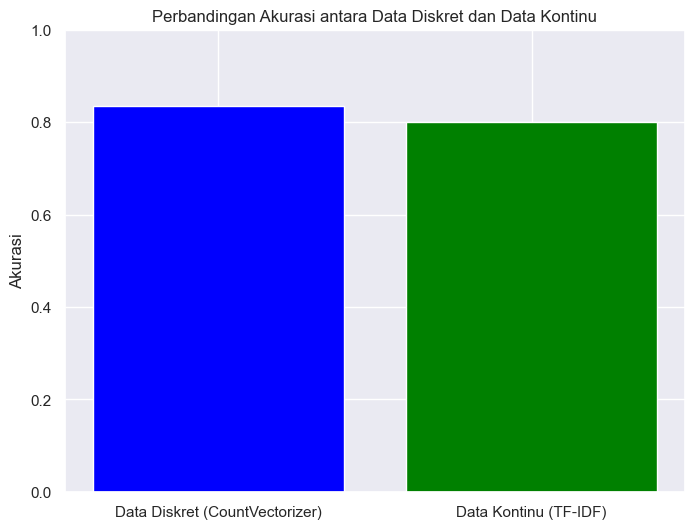

In [235]:
labels = ['Data Diskret (CountVectorizer)', 'Data Kontinu (TF-IDF)']
accuracies = [accuracy_count, accuracy_tfidf]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Perbandingan Akurasi antara Data Diskret dan Data Kontinu')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

<h3>Dataset Pertama: Name_Gender</h3>

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

In [237]:
file_path = 'name_gender_dataset.csv'
df = pd.read_csv(r"E:/_Kuliah/Semester 5/MachineLearning/Week5/name_gender_dataset.csv")

df.head()

df.dropna()

,Name,Gender,Count,Probability
0,James,M,5304407,1.451679e-02
1,John,M,5260831,1.439753e-02
2,Robert,M,4970386,1.360266e-02
3,Michael,M,4579950,1.253414e-02
4,William,M,4226608,1.156713e-02
...,...,...,...,...
147264,Zylenn,M,1,2.736740e-09
147265,Zymeon,M,1,2.736740e-09
147266,Zyndel,M,1,2.736740e-09
147267,Zyshan,M,1,2.736740e-09


In [238]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

X = df['Name']
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [240]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred = nb_model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi untuk data diskret: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Akurasi untuk data diskret: 0.5617
              precision    recall  f1-score   support

           0       0.59      0.89      0.71     18029
           1       0.18      0.04      0.06     11425

    accuracy                           0.56     29454
   macro avg       0.39      0.47      0.39     29454
weighted avg       0.44      0.56      0.46     29454



In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

scaler = StandardScaler(with_mean=False)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = gnb_model.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Akurasi untuk data kontinu (TF-IDF): {accuracy_tfidf:.4f}')
print(classification_report(y_test, y_pred_tfidf))

Akurasi untuk data kontinu (TF-IDF): 0.4154
              precision    recall  f1-score   support

           0       0.82      0.06      0.11     18029
           1       0.40      0.98      0.57     11425

    accuracy                           0.42     29454
   macro avg       0.61      0.52      0.34     29454
weighted avg       0.66      0.42      0.28     29454



In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [243]:
count_vectorizer = TfidfVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

mnb_model = MultinomialNB()
mnb_model.fit(X_train_count, y_train)

y_pred_count = mnb_model.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)

In [244]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)

y_pred_tfidf = gnb_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

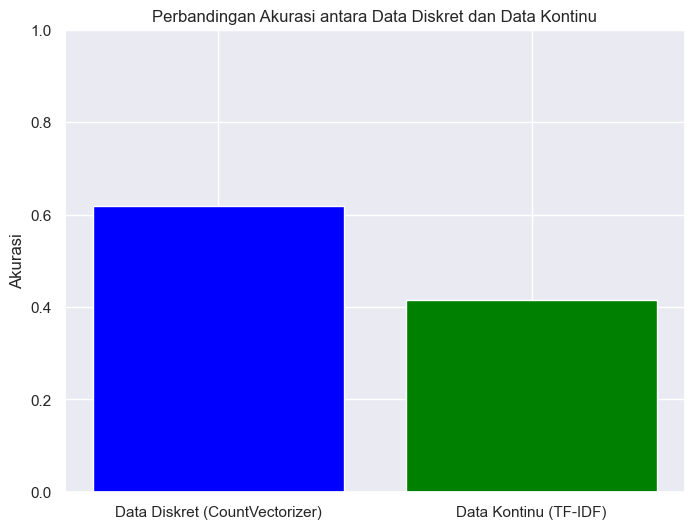

In [245]:
labels = ['Data Diskret (CountVectorizer)', 'Data Kontinu (TF-IDF)']
accuracies = [accuracy_count, accuracy_tfidf]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Perbandingan Akurasi antara Data Diskret dan Data Kontinu')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

<h3>Dataset Kedua: Movie Sentiment</h3>

In [246]:
file_path1 = 'name_gender_dataset.csv'
df1 = pd.read_csv(r"E:/_Kuliah/Semester 5/MachineLearning/Week5/movie.csv")

df1.head()

df1.dropna()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [247]:
X = df1['text']
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [249]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred = nb_model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi untuk data diskret: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Akurasi untuk data diskret: 0.8512
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3966
           1       0.88      0.82      0.85      4034

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

scaler = StandardScaler(with_mean=False)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = gnb_model.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Akurasi untuk data kontinu (TF-IDF): {accuracy_tfidf:.4f}')
print(classification_report(y_test, y_pred_tfidf))

Akurasi untuk data kontinu (TF-IDF): 0.8037
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3966
           1       0.82      0.79      0.80      4034

    accuracy                           0.80      8000
   macro avg       0.80      0.80      0.80      8000
weighted avg       0.80      0.80      0.80      8000



In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [252]:
count_vectorizer = TfidfVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

mnb_model = MultinomialNB()
mnb_model.fit(X_train_count, y_train)

y_pred_count = mnb_model.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)

In [253]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)

y_pred_tfidf = gnb_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

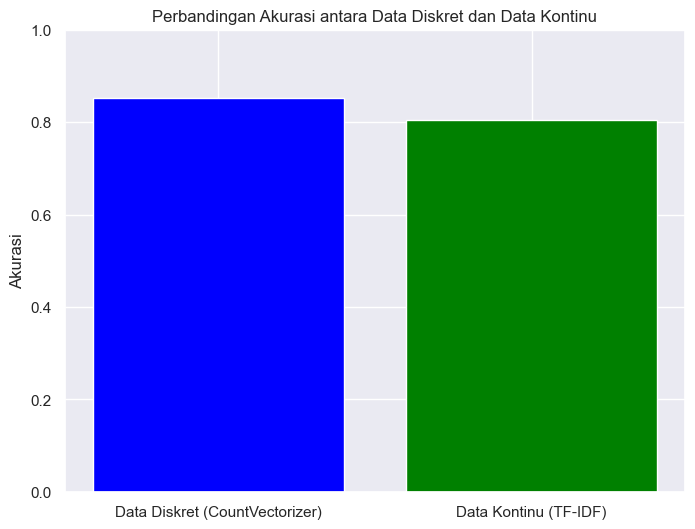

In [255]:
labels = ['Data Diskret (CountVectorizer)', 'Data Kontinu (TF-IDF)']
accuracies = [accuracy_count, accuracy_tfidf]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Perbandingan Akurasi antara Data Diskret dan Data Kontinu')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

    1. Perbandingan Dataset: 
    Dataset pertama menunjukkan akurasi sebesar 42% pada data kontinu dan 52% pada data diskret. Sementara itu, dataset kedua memberikan hasil yang lebih tinggi, dengan akurasi 80% pada data kontinu dan 85% pada data diskret.

    2. Hasil Akurasi yang Diberikan: 
    Dataset Name_Gender menghasilkan akurasi 42% pada data kontinu dan 52% pada data diskret, sedangkan dataset Movie Sentiment mencapai akurasi 80% pada data kontinu dan 85% pada data diskret.

    3. Pemikiran dan Observasi Akhir: Dalam implementasi algoritma Naive Bayes di Python, terdapat dua pendekatan utama, yaitu Multinomial dan Gaussian. Kedua pendekatan ini memberikan hasil akurasi yang berbeda karena masing-masing memiliki metode perhitungan yang berbeda dalam mengolah dataset yang digunakan.

In [256]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Reinhard Javera Maheswara
NIM: 	77732
Time-stamp:	2024-09-29 22:58:24.858276


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [257]:
!jupyter nbconvert --to html "./IF540L_H_laporan_M05_00000077732_Reinhard Javera Maheswara.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_H_laporan_M05_00000077732_Reinhard Javera Maheswara.ipynb to html
E:\Anaconda\Lib\site-packages\nbformat\__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 963504 bytes to IF540L_H_laporan_M05_00000077732_Reinhard Javera Maheswara.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#